In [53]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
import re

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ' , '_')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [5]:
df = df[(df['ocean_proximity'] =='<1h_ocean') | (df['ocean_proximity'] == 'inland')]  
df = df.reset_index(drop=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.total_bedrooms = df.total_bedrooms.fillna(0)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [8]:
df_full_train, df_val = train_test_split(df, test_size=0.20, random_state=1,)
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state =1,  )

df_train = df_train.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

len(df_full_train), len(df_train), len(df_test), len(df_val)

(12549, 9411, 9411, 3138)

In [9]:
y_train = df_train.median_house_value.values
y_test = df_test.median_house_value.values
y_val = df_val.median_house_value.values

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
y_val = np.log1p(y_val)


del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [10]:
train_dicts = df_train.to_dict(orient='records')
test_dicts = df_test.to_dict(orient = 'records')
val_dicts = df_val.to_dict(orient= 'records')

In [11]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [12]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [13]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1h_ocean <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1h_ocean >  0.50
|   |--- value: [12.30]



### Answer 1 : ocean_proximity

In [14]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [20]:
X_val = dv.transform(val_dicts)
y_pred = rf.predict(X_val)

In [22]:
print(np.sqrt(mean_squared_error(y_val, y_pred)))

0.23002131373370419


### Answer 2: 0.245

In [28]:
scores = []

for n in tqdm(range(10,201,10)): 
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.36s/it]


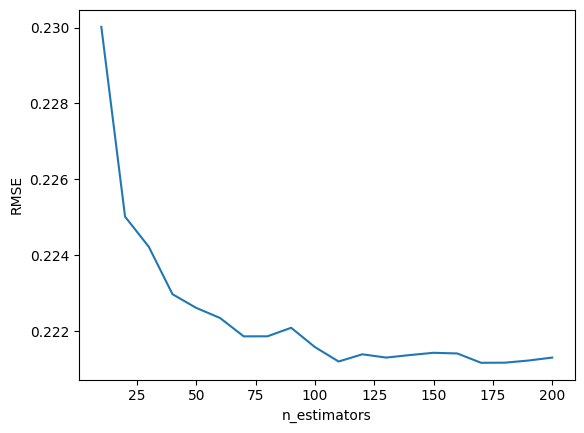

In [37]:
plt.plot(df_scores.n_estimators,  df_scores.rmse)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.show()

### Answer 3: 160

In [39]:
scores = []

for d in tqdm([10,15,20,25]):
    rf = RandomForestRegressor(n_estimators=0, max_depth=d, random_state=1, n_jobs=-1, warm_start=True)
    
    for n in range(10,201,10): 
        rf.n_estimators = n 
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))
        
        scores.append((d,n,score))
        
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.90s/it]


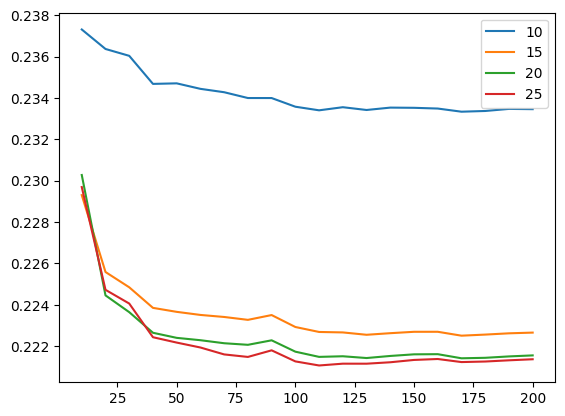

In [40]:
for d in [10,15,20,25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)
    
plt.legend()
plt.show()

### Answer 4: 25

In [41]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [42]:
rf.feature_importances_

array([0.0149816 , 0.03027717, 0.10220348, 0.08642345, 0.33501342,
       0.21881985, 0.14745955, 0.02788146, 0.0153128 , 0.0216272 ])

In [43]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,households,0.014982
1,housing_median_age,0.030277
2,latitude,0.102203
3,longitude,0.086423
4,median_income,0.335013
5,ocean_proximity=<1h_ocean,0.218820
6,ocean_proximity=inland,0.147460
7,population,0.027881
8,total_bedrooms,0.015313
9,total_rooms,0.021627


In [44]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
4,median_income,0.335013
5,ocean_proximity=<1h_ocean,0.218820
6,ocean_proximity=inland,0.147460
2,latitude,0.102203
3,longitude,0.086423


### Answer 5: median_income

In [54]:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

In [56]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [64]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [59]:
#@ DEFINING THE FUNCTION:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [61]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals = watchlist)

In [65]:
scores['eta=0.3'] = parse_xgb_output(output)

In [66]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals = watchlist)

In [67]:
scores['eta=0.1'] = parse_xgb_output(output)

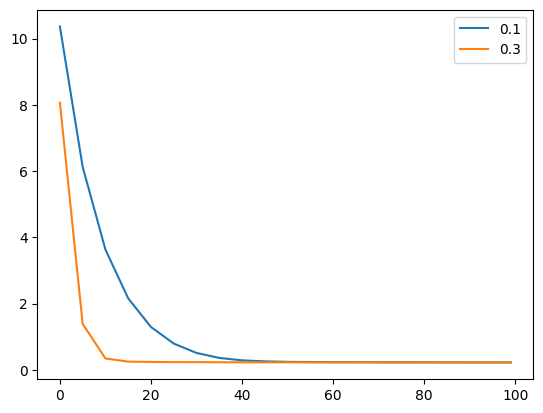

In [68]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc, label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc, label='0.3')

plt.legend()
plt.show()

In [ ]:
### Answer 6: Both give equal 